In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost


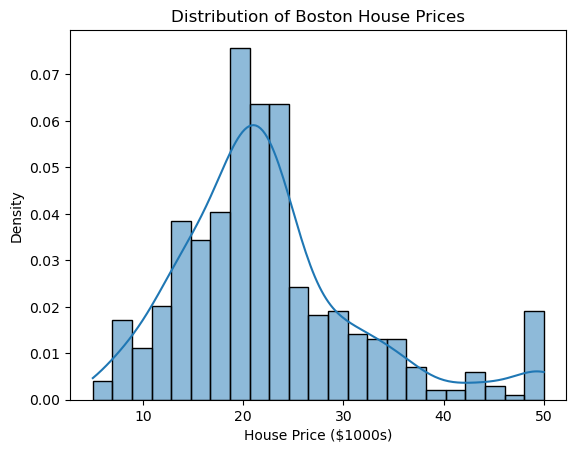

In [2]:
from sklearn.datasets import fetch_openml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Boston housing dataset from openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
x = boston.data
y = boston.target.astype(float)  # ensure it's numeric

# Visualize
sns.histplot(y, kde=True, stat="density")
plt.title("Distribution of Boston House Prices")
plt.xlabel("House Price ($1000s)")
plt.show()


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)

# Normalize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [5]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

models = [
    LinearRegression(),
    RidgeCV(alphas=(0.001, 0.1, 1), cv=3),
    LassoCV(alphas=(0.001, 0.1, 1), cv=5),
    RandomForestRegressor(n_estimators=10),
    GradientBoostingRegressor(n_estimators=30),
    SVR(),
    ElasticNet(alpha=0.001, max_iter=10000),
    XGBRegressor()
]

names = ['LinearRegression', 'Ridge', 'Lasso', 'Random Forest', 'GBDT', 'SVR', 'ElasticNet', 'XGBoost']

for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    print(f"{name}: R2 = {score:.4f}")


LinearRegression: R2 = 0.5641
Ridge: R2 = 0.5637
Lasso: R2 = 0.5640
Random Forest: R2 = 0.6630
GBDT: R2 = 0.7385
SVR: R2 = 0.5173
ElasticNet: R2 = 0.5640
XGBoost: R2 = 0.7718


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 0.5, 0.9, 1, 5],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVR(), param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best R2:", grid_search.best_score_)


Best Params: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Best R2: 0.7965173649188232


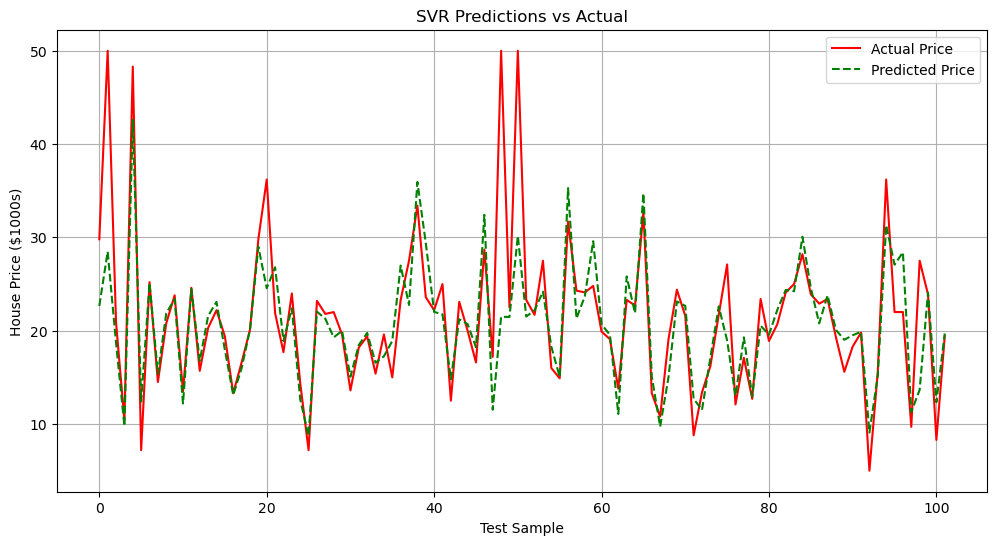

In [7]:
y_pred = grid_search.predict(x_test)

plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test, 'r-', label="Actual Price")
plt.plot(range(len(y_pred)), y_pred, 'g--', label="Predicted Price")
plt.legend()
plt.title("SVR Predictions vs Actual")
plt.xlabel("Test Sample")
plt.ylabel("House Price ($1000s)")
plt.grid(True)
plt.show()
